<a href="https://colab.research.google.com/github/bhuiyanmobasshir94/MultiCoNER/blob/main/notebooks/Dataset_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

for finding the how much our test data (T) is biased towards our data (A), rifat et al. data (R) and karim et al. (K)

works are listed here in below:

1) count vector using count vectorizer based on K+R+A+T
2) Perf. PCA on whole 2D
3) Nearest Neighbor 
4) Cosine Similarity 
5) Cosine Score Histogram (Color: green vs red) if overlap than data is not biased

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])

In [11]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [16]:
len(newsgroups_train.target)

1073

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


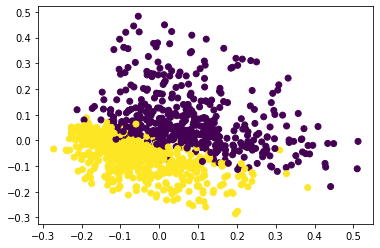

In [15]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(newsgroups_train.data).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=newsgroups_train.target)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


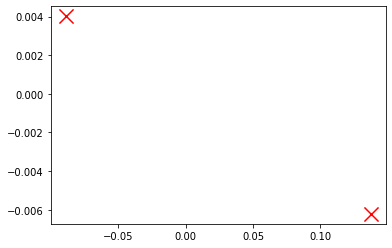

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

# plt.hold(True)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.show() 